# Import Statements

In [55]:
import pandas as pd # Imported to enable the use of datastructures like dataframe
import matplotlib.pyplot as plt # Imported to visusalise data
import seaborn as sns # Imported to visualise data
import numpy as np # Imported for calculations
from sklearn.feature_extraction.text import TfidfVectorizer # Imported to convert raw documents into a matrix of tf idf features
from sklearn.linear_model import LogisticRegression # Imported to enable the use of logistic regression to classify text
from sklearn.model_selection import train_test_split # Imported to enable the user to split the data into train, test samples
from sklearn.metrics import classification_report, accuracy_score # Imported to calculate the accuracy and also print the classification report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score # for report generation
import emoji #Imported to check how many sentences have emojis

# imports for word cloud
from collections import Counter
from wordcloud import WordCloud


# Importing the dataset

In [10]:
df = pd.read_csv('malayalam.tsv', sep='\t')
print(df)

             category                                               text
0      unknown_state    Ichayan fans pinne mmade ettan fansm ivde oru...
1      not-malayalam              Tovi 🥰 Best Wishes From #Kunjikka Fans
2      unknown_state    Urutty koll .nallavanaaya unniyaya saiju kuru...
3      not-malayalam    Pls support me pls       My channel subscribe...
4           Positive      Kalki super hit akum enn Bonny parayan paranju
...               ...                                                ...
6734        Positive      Jayettanu eduthal pongayha role aan...next idi
6735        Positive                 This looks like... Thrishur pooram.
6736        Negative    Mammukka verum vishayam engneru eth enthonn c...
6737  Mixed_feelings    Pulikku pakaram patti odande vere mattam onnu...
6738        Positive    Ithin dislike addikunavar lokka tholvikallayi...

[6739 rows x 2 columns]


# Exploring the dataset

In [11]:
print(df.shape)
df.head()

(6739, 2)


,category,text
0,unknown_state,Ichayan fans pinne mmade ettan fansm ivde oru...
1,not-malayalam,Tovi 🥰 Best Wishes From #Kunjikka Fans
2,unknown_state,Urutty koll .nallavanaaya unniyaya saiju kuru...
3,not-malayalam,Pls support me pls My channel subscribe...
4,Positive,Kalki super hit akum enn Bonny parayan paranju


## Descrpancy Found

In [68]:
# Database is imbalanced, nothing has been done to rectify this.

value_counts = df['category'].value_counts()
print(value_counts)

Positive          2811
Neutral           1903
Not-Malayalam      884
Negative           738
Mixed_feelings     403
Name: category, dtype: int64


In [69]:
# Pre processing is not done as mentioned in the paper.


# We preprocessed the comments by removing the emoji’s, 
# and sentence length longer than 15 or less than 5 words since 
# sentence more than 15 words will be difficult for annotators. 
# After cleaning, we got 6,738 sentences for Malayalam-English 
# code-mixed post comments.

unique_values_count = df['column_name'].nunique()

# Function to count words in a sentence
def count_words(sentence):
    return len(sentence.split())

# Apply the function and filter the DataFrame
df_wordsGreater15 = df[df['text'].apply(lambda x: count_words(x) > 15)]
df_wordsLess5 = df[df['text'].apply(lambda x: count_words(x) < 5)]


# Function to check if a sentence contains any emoji
def contains_emoji(sentence):
    for character in sentence:
        if emoji.is_emoji(character):
            return True
    return False

# Apply the function and count sentences with emojis
df_emojis = df[df['text'].apply(contains_emoji)]

print(df_wordsGreater15.shape) #236 sentences have more than 15 words
print(df_wordsLess5.shape) #346 sentences have less than 5 words
print(df_emojis.shape) #309 sentences have emojis in them


KeyError: 'column_name'

In [13]:
# Renaming the classes

# Removing any leading/trailing spaces
df['category'] = df['category'].str.strip()

# Replacing 'unknown_state' with 'Irrelevant'
df['category'] = df['category'].replace({'unknown_state': 'Neutral'})
df['category'] = df['category'].replace({'not-malayalam': 'Not-Malayalam'})

# Viewing the number of items in each class after replacement
print(df['category'].value_counts())  # Used to view the number of items in each class.

## There is a significant imbalance in the classes in this dataset

Positive          2811
Neutral           1903
Not-Malayalam      884
Negative           738
Mixed_feelings     403
Name: category, dtype: int64


# Visualising the data

In [14]:

# Calculate sentence length in terms of words and characters
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Summary statistics for sentence lengths
sentence_length_stats = df[['word_count', 'char_count']].describe()

print(sentence_length_stats)

        word_count   char_count
count  6739.000000  6739.000000
mean      8.128357    59.601870
std       3.128019    27.054469
min       1.000000     4.000000
25%       6.000000    41.000000
50%       7.000000    54.000000
75%       9.000000    72.000000
max      24.000000   207.000000


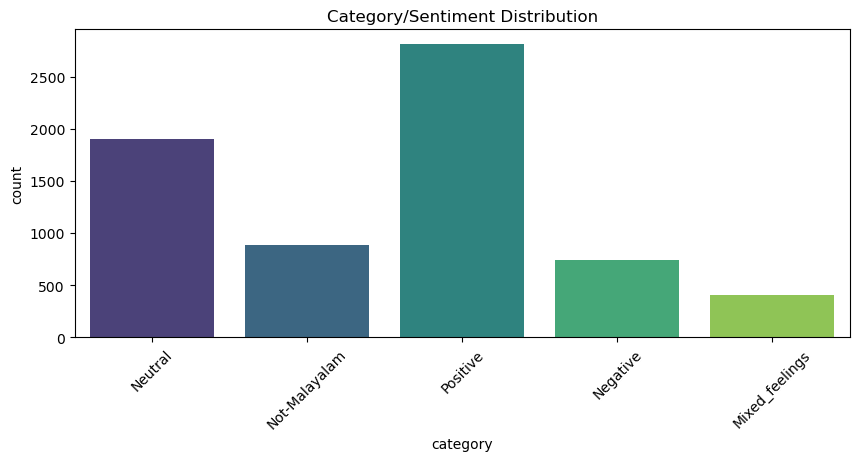

In [15]:
# Category distribution
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='category', palette="viridis")
plt.title('Category/Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()

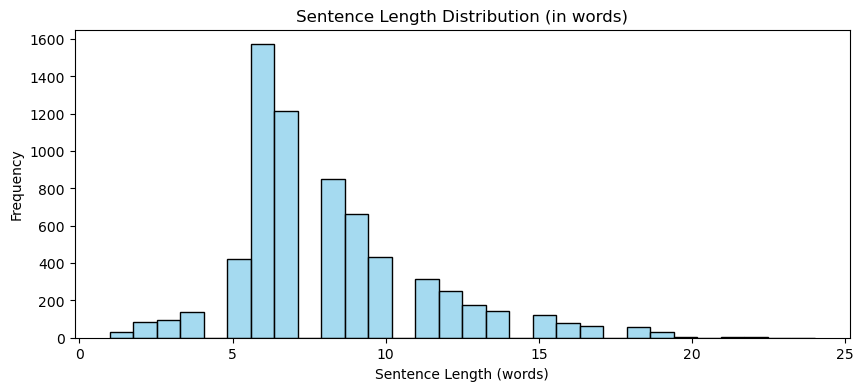

In [16]:
# Sentence length distribution in words
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='word_count', bins=30, color='skyblue')
plt.title('Sentence Length Distribution (in words)')
plt.xlabel('Sentence Length (words)')
plt.ylabel('Frequency')
plt.show()

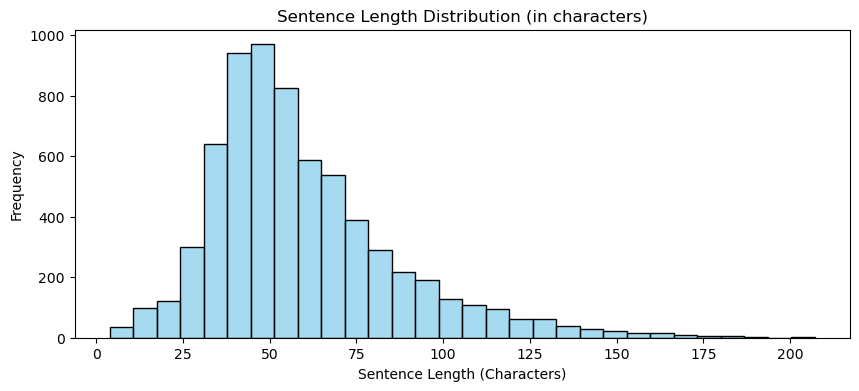

In [17]:
# Sentence length distribution in characters
plt.figure(figsize=(10,4))
sns.histplot(data=df, x='char_count', bins=30, color='skyblue')
plt.title('Sentence Length Distribution (in characters)')
plt.xlabel('Sentence Length (Characters)')
plt.ylabel('Frequency')
plt.show()

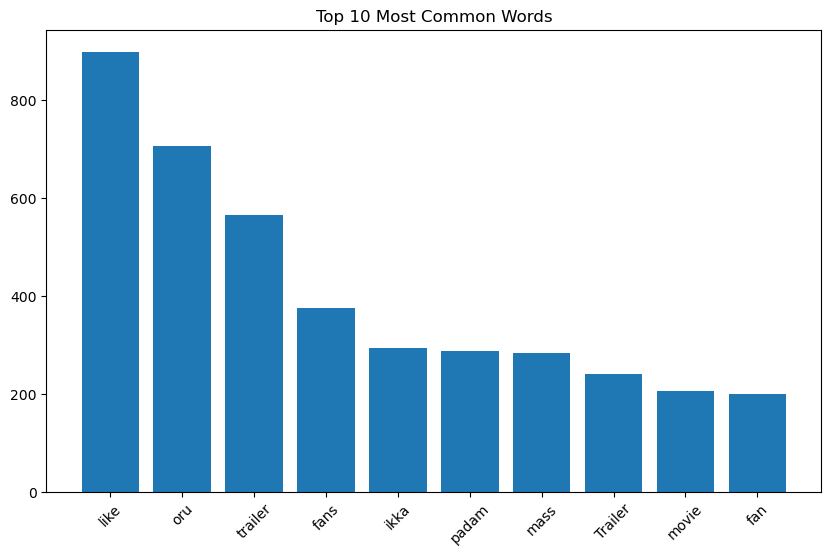

In [62]:
# Word Frequency Analysis
all_words = ' '.join(df['text']).split()
word_frequencies = Counter(all_words)
most_common_words = word_frequencies.most_common(10)

# Plotting the most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

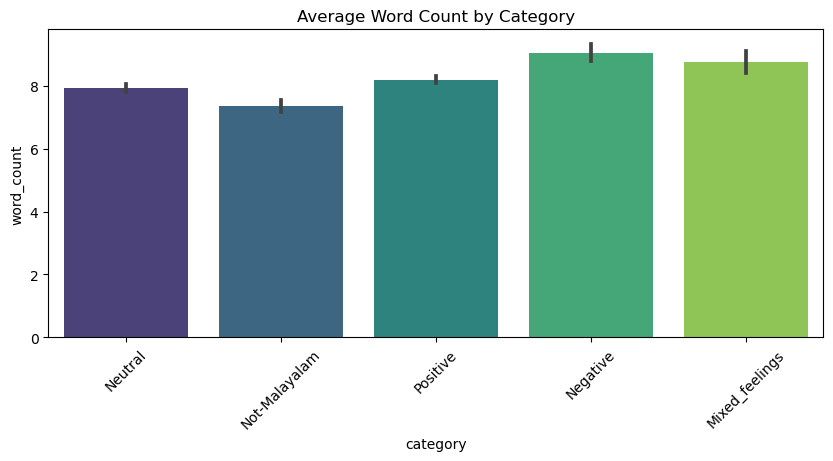

In [19]:
# Category-wise Word Counts

plt.figure(figsize=(10, 4))
sns.barplot(x='category', y='word_count', data=df, estimator=np.mean, palette='viridis')
plt.title('Average Word Count by Category')
plt.xticks(rotation=45)
plt.show()

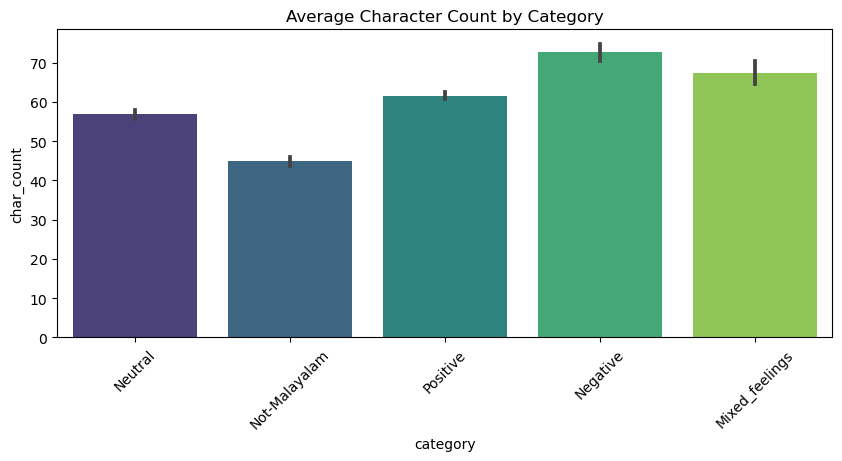

In [20]:
#  Category-wise Character Counts

plt.figure(figsize=(10, 4))
sns.barplot(x='category', y='char_count', data=df, estimator=np.mean,palette='viridis')
plt.title('Average Character Count by Category')
plt.xticks(rotation=45)
plt.show()

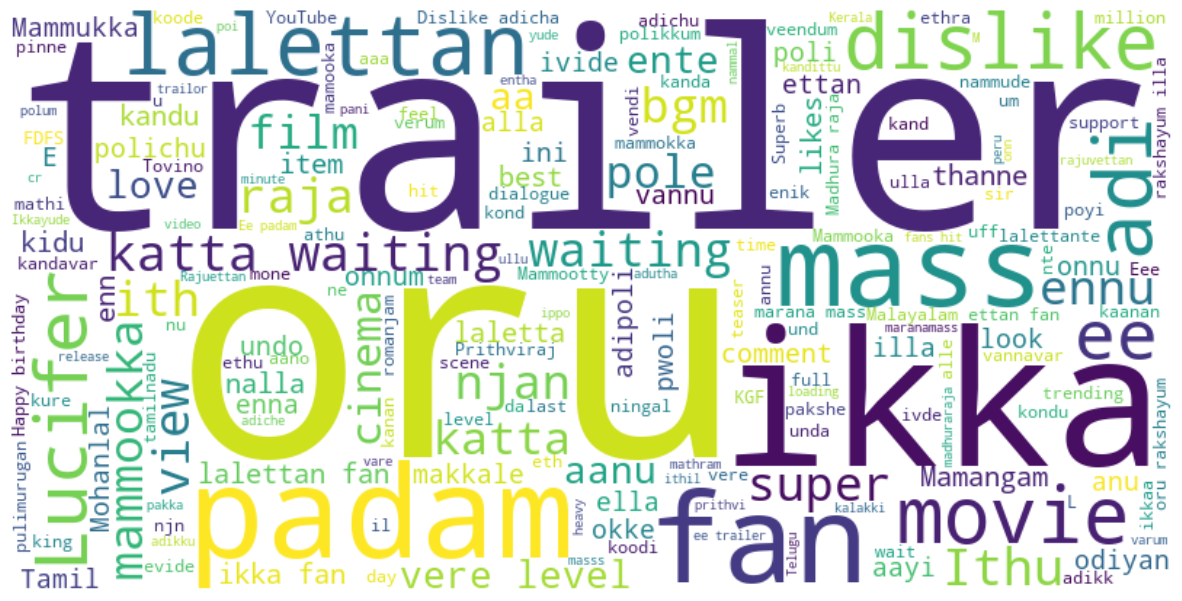

In [21]:
# Word Cloud

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(all_words))
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

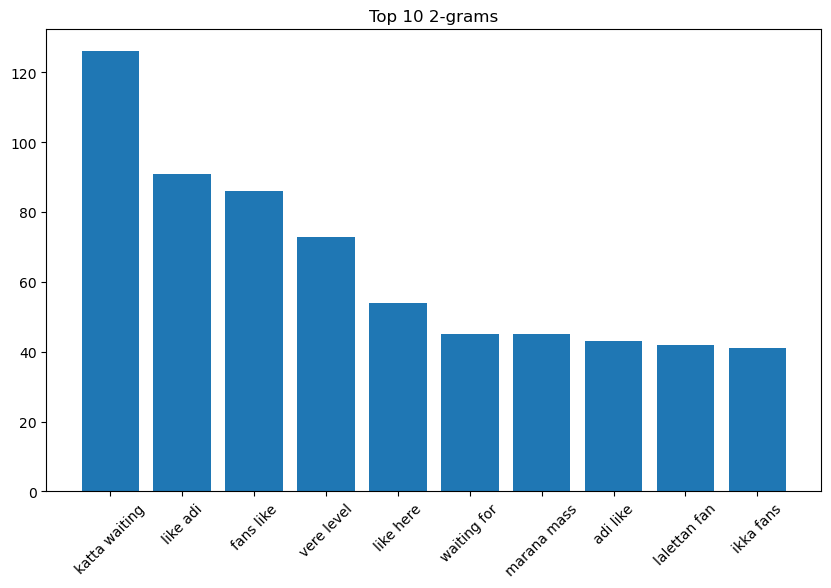

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_ngram_distribution(texts, n=None):
    """Plot the distribution of n-grams."""
    vect = CountVectorizer(ngram_range=(n, n)).fit(texts)
    bag_of_words = vect.transform(texts)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    top_n_words = words_freq[:10]
    
    plt.figure(figsize=(10, 6))
    plt.bar(*zip(*top_n_words))
    plt.title(f'Top 10 {n}-grams')
    plt.xticks(rotation=45)
    plt.show()

# Example usage for bigrams
plot_ngram_distribution(df['text'], n=2)


[nltk_data] Downloading package punkt to /Users/sachin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sachin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


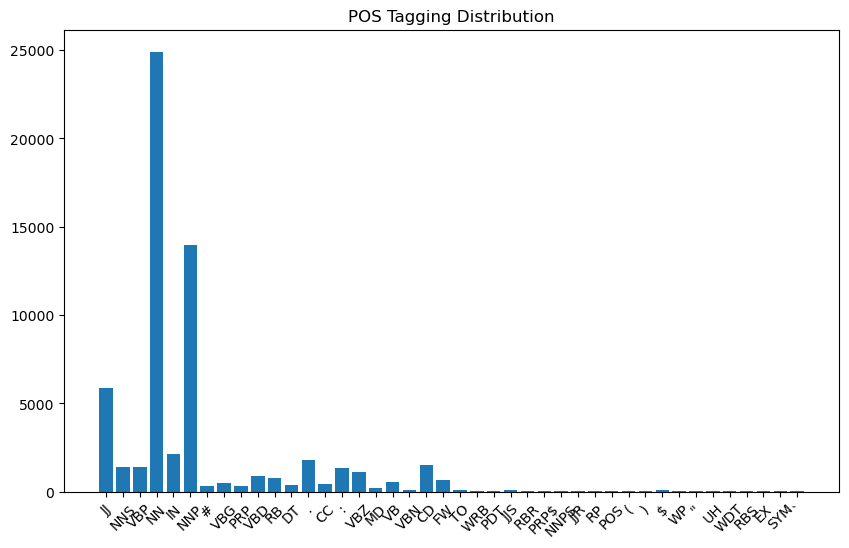

In [22]:
import nltk
from collections import Counter

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# POS Tagging
words = nltk.word_tokenize(' '.join(df['text']))
pos_tags = nltk.pos_tag(words)
pos_counts = Counter(tag for word, tag in pos_tags)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title('POS Tagging Distribution')
plt.xticks(rotation=45)
plt.show()


### Next we would need to map these classes into numbers for the machine learning model

In [23]:
df['label_num'] = df.category.map({
    'Positive':0,
    'Negative':1,
    'Mixed_feelings':2,
    'Neutral':3,
    'Not-Malayalam':4
})

df.head

<bound method NDFrame.head of             category                                               text  \
0            Neutral   Ichayan fans pinne mmade ettan fansm ivde oru...   
1      Not-Malayalam             Tovi 🥰 Best Wishes From #Kunjikka Fans   
2            Neutral   Urutty koll .nallavanaaya unniyaya saiju kuru...   
3      Not-Malayalam   Pls support me pls       My channel subscribe...   
4           Positive     Kalki super hit akum enn Bonny parayan paranju   
...              ...                                                ...   
6734        Positive     Jayettanu eduthal pongayha role aan...next idi   
6735        Positive                This looks like... Thrishur pooram.   
6736        Negative   Mammukka verum vishayam engneru eth enthonn c...   
6737  Mixed_feelings   Pulikku pakaram patti odande vere mattam onnu...   
6738        Positive   Ithin dislike addikunavar lokka tholvikallayi...   

      word_count  char_count  label_num  
0             13          8

# Preparing the Training, and Test Dataset

In [36]:
# Splitting the dataset

# Training Set: 70%
# Test Set: 20%
# Validation Set: 10%

X_train, X_temp, y_train, y_temp = train_test_split(
    df.text, 
    df.category,
    test_size=.3, # 30% of samples will be present in temporary dataset
    random_state=42)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, 
    y_temp,
    test_size=1/3, # 10% -> X_val and rest 20% -> X_test
    random_state=42)

# print(X_train,y_train)

# Vectorization using TF-IDF
v = TfidfVectorizer()   
X_train_tfidf = v.fit_transform(X_train)
X_test_tfidf = v.transform(X_test)

# print(X_test_tfidf)
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(X_val.shape)

(4717, 12599)
(1348, 12599)
(674,)


# Implementing the Logistic Regression Model

In [37]:
# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)

# Predictions and evaluation
predictions = log_reg.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.6683976261127597
                precision    recall  f1-score   support

Mixed_feelings       0.69      0.11      0.19        80
      Negative       0.85      0.45      0.59       142
       Neutral       0.60      0.66      0.63       361
 Not-Malayalam       0.75      0.56      0.64       163
      Positive       0.67      0.83      0.74       602

      accuracy                           0.67      1348
     macro avg       0.71      0.52      0.56      1348
  weighted avg       0.68      0.67      0.65      1348



Accuracy: 0.6683976261127597

Classification Report:
                 precision    recall  f1-score   support

Mixed_feelings       0.69      0.11      0.19        80
      Negative       0.85      0.45      0.59       142
       Neutral       0.60      0.66      0.63       361
 Not-Malayalam       0.75      0.56      0.64       163
      Positive       0.67      0.83      0.74       602

      accuracy                           0.67      1348
     macro avg       0.71      0.52      0.56      1348
  weighted avg       0.68      0.67      0.65      1348



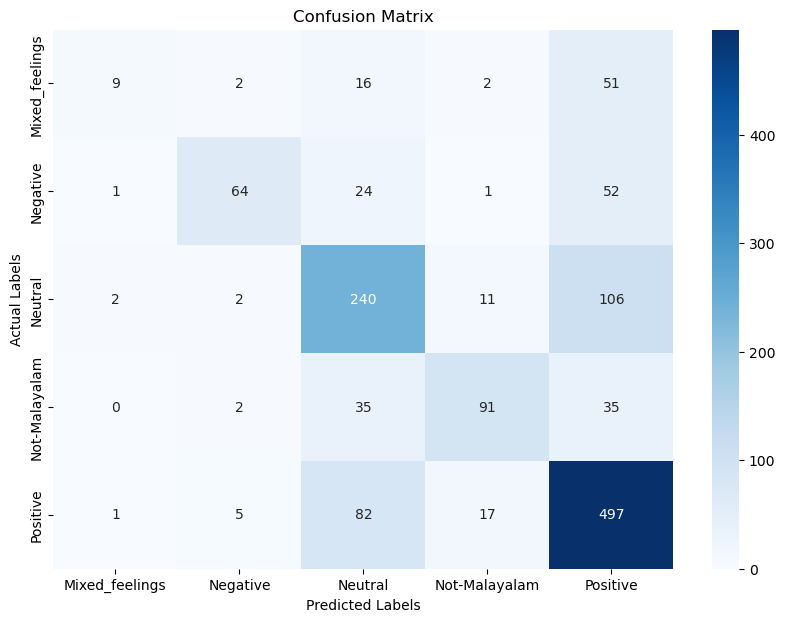

In [48]:
# Assuming predictions have been made as shown earlier
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)
class_names = np.unique(y_test)  # Assuming y_test contains your actual labels

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()